In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.7.0
TensorFlow version: 2.18.0


### Setting Up the Path and Loading Data

In [4]:
# Define the path to the dataset
path = r"C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\Real-World Applications of ML\02 Data\2.5 Multi-class Weather Dataset\archive\Multi-class Weather Dataset"

# Verify folder structure
folders = os.listdir(path)
print(folders)  # Output: ['Cloudy', 'Rain', 'Shine', 'Sunrise']

# Rescale and split data into training and validation sets
datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250, 250),
    batch_size=32,
    subset='training'
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250, 250),
    batch_size=32,
    subset='validation'
)


['Cloudy', 'Rain', 'Shine', 'Sunrise']
Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


### Building the CNN Model

In [7]:
# Define the model architecture
inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5, 5), activation='relu')(inputs)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(64, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(128, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

### Compiling and Training the Model

In [10]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=16,  # Adjust epochs based on your observations
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)


C:\Users\isaac\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.5336 - loss: 1.0772 - val_accuracy: 0.6116 - val_loss: 0.8282
Epoch 2/16
 1/28 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5938 - loss: 0.7502

C:\Users\isaac\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - accuracy: 0.5938 - loss: 0.7502 - val_accuracy: 0.6384 - val_loss: 0.7822
Epoch 3/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.7657 - loss: 0.5948 - val_accuracy: 0.7411 - val_loss: 0.6443
Epoch 4/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.9688 - loss: 0.2458 - val_accuracy: 0.7098 - val_loss: 0.7885
Epoch 5/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7930 - loss: 0.5557 - val_accuracy: 0.7723 - val_loss: 0.6214
Epoch 6/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.6875 - loss: 0.6298 - val_accuracy: 0.7812 - val_loss: 0.5888
Epoch 7/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8539 - loss: 0.4395 - val_accuracy: 0.7589 - val_loss: 0.5572
Epoch 8/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.9375 - loss: 0.3338 - val_accuracy: 0.8036 - val_loss: 0.4974
Epoch 9/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8599 - loss: 0.4396 - val_accuracy: 0.7857 - val_loss: 0.

### Analyzing Model Performance

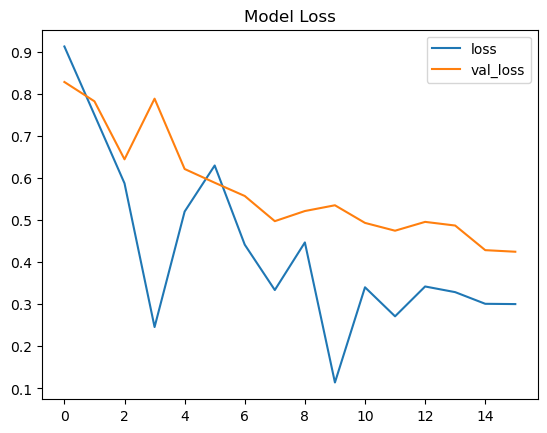

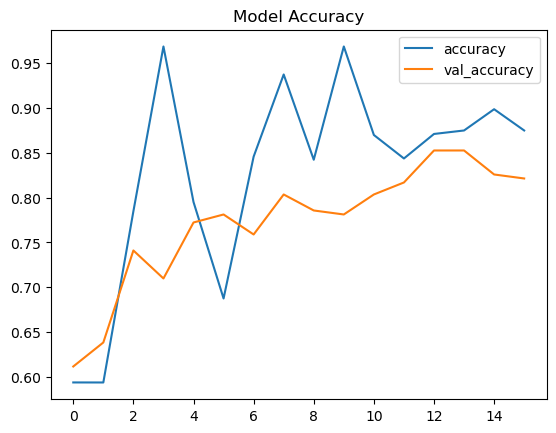

Accuracy: 0.875, Validation Accuracy: 0.8214285969734192
Loss: 0.300346702337265, Validation Loss: 0.4247617721557617


In [13]:
# Convert history to DataFrame for analysis
results = pd.DataFrame(history.history)

# Plot loss
results[['loss', 'val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')
plt.show()

# Plot accuracy
results[['accuracy', 'val_accuracy']].plot(title='Model Accuracy')
plt.savefig('./accuracy.png')
plt.show()

# Print final metrics
print(f"Accuracy: {results['accuracy'].iloc[-1]}, Validation Accuracy: {results['val_accuracy'].iloc[-1]}")
print(f"Loss: {results['loss'].iloc[-1]}, Validation Loss: {results['val_loss'].iloc[-1]}")


### Generating the Confusion Matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step


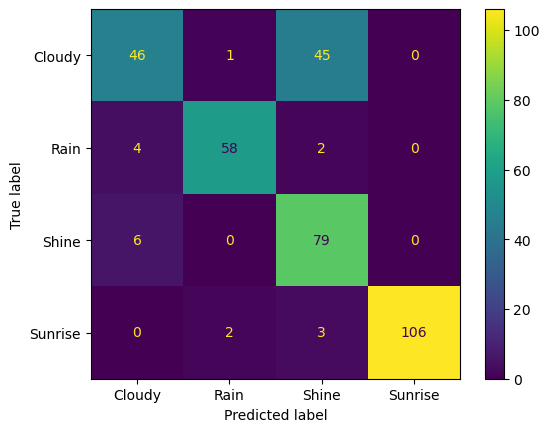

In [16]:
class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n_batches = 10  # Adjust as needed

# Collect predictions
image_batch, classes_batch = next(test_generator)

for batch in range(n_batches):
    temp_images, temp_labels = next(test_generator)
    image_batch = np.concatenate((image_batch, temp_images))
    classes_batch = np.concatenate((classes_batch, temp_labels))

y_predict = model.predict(image_batch)
cm = confusion_matrix(
    y_pred=[np.argmax(x) for x in y_predict],
    y_true=[np.argmax(x) for x in classes_batch]
)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

### Predicting Individual Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


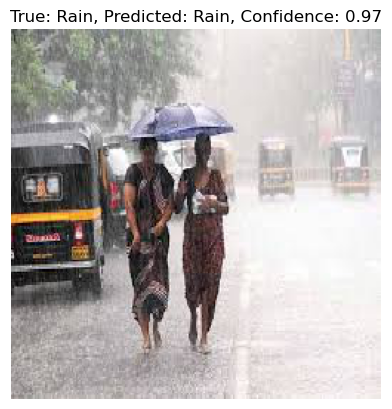

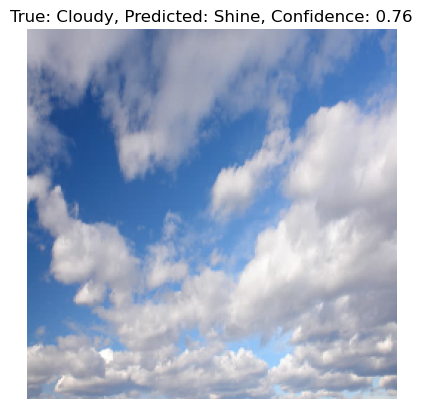

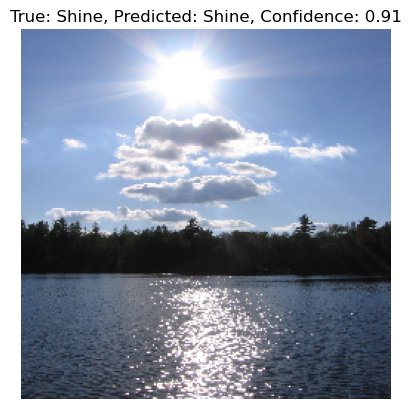

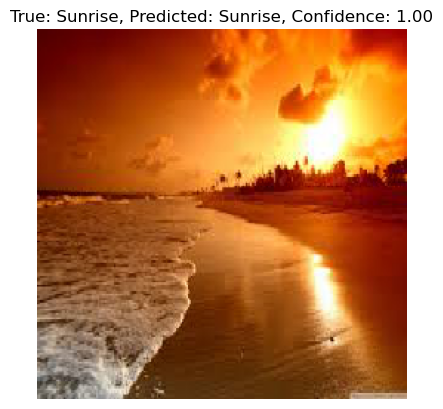

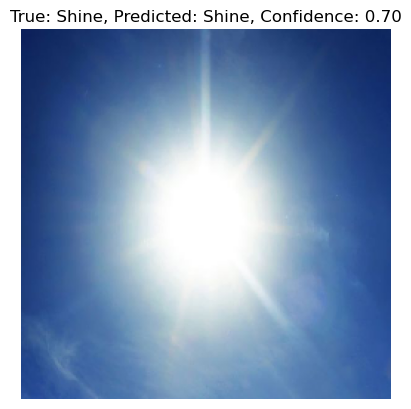

In [19]:
def predict_images(model, num_images=5):
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)

    for i in range(num_images):
        image = image_batch[i]
        true_label = class_names[np.argmax(classes_batch[i])]
        predicted_label = class_names[np.argmax(predicted_batch[i])]
        confidence = predicted_batch[i][np.argmax(predicted_batch[i])]

        plt.imshow(image)
        plt.title(f"True: {true_label}, Predicted: {predicted_label}, Confidence: {confidence:.2f}")
        plt.axis('off')
        plt.show()

# Predict and visualize
predict_images(model, num_images=5)
